# Darwin's Finches on Daphne Major : Exploratory Data Analysis of beaks measurements 

This project is based on DataCamp's course on "Statistical Thinking in Python, Part 2" looking into the EDA of beak depth and length of Darwin's finches.

Every year since 1973, Peter and Rosemary Grant have monitored two dominant finch species on the island of Daphne Major in the Galápagos. 
The researches have monitored the species, Geospiza fortis and Geospiza scandens, making some physiolofical measurements, taking some samples for genetic sequencing and more. We will be looking primarly at the beak length and the beak depth of both species and exploring how it varies over time from species to species and from parents to offspring. 

This dataset was taken from kaggle; 
Steve Ivan. (2019, July). Darwin Scandens Finches Beaks, Version 1. Retrieved March 22, 2021 from https://www.kaggle.com/stenivan/darwin-scandens-finches-beaks/metadata .

In [1]:
#import some useful packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Index
1. [Cleaning Data](#Cleaning)
2. [Looking at the Data](#hist)
    1. Histograms
3. [Exploratory Data Analysis](#EDA)
    1. [Beaks Depth](#BD)
        1. Swarmplot
        2. ECDF 
        3. Parameter estimation of beak depth - bootstrap replicate of 1D data and multiple bootstrap replicates.
        4. Estimate the difference of the mean beak depth of the G.scandens between 1975 and 2012. Hypothesis testing.
    2. [Variation in beak shapes](#shape)
        1. Liner Regression.
        2. Pairs bootstrap for linear regression. 
        3. Beak length to depth ratio. 

In [2]:
# Import the data
data_75 = pd.read_csv("C:/Users/madal/Documents/Projects/finches/finch_beaks_1975.csv")
data_12 = pd.read_csv("C:/Users/madal/Documents/Projects/finches/finch_beaks_2012.csv")

In [3]:
# Looking at the raw data
display(data_75.head())
display(data_12.head())

,band,species,"Beak length, mm","Beak depth, mm"
0,2,fortis,9.4,8.0
1,9,fortis,9.2,8.3
2,12,fortis,9.5,7.5
3,15,fortis,9.5,8.0
4,305,fortis,11.5,9.9


,band,species,blength,bdepth
0,19022,fortis,10.0,8.5
1,19028,fortis,12.5,8.9
2,19032,fortis,9.3,7.5
3,19041,fortis,10.3,9.6
4,19044,fortis,11.0,9.2


<a id="Cleaning"></a>

## Data Cleaning


In [4]:
# checking for NaN
display(data_75[['species', 'Beak length, mm', 'Beak depth, mm']].isna().sum())
display(data_12[['species', 'blength', 'bdepth']].isna().sum())

# Checking the number of observations per year
print('For 1975 there are : ', len(data_75), ' observations')
print('For 2012 there are : ', len(data_12), ' observations')

# adding a year column to each dataframe (will help with the plotting)
data_75['year'] = 1975
data_12['year'] = 2012

# Matching the columns names
data_12.rename(columns ={'blength': 'Beak length, mm', 'bdepth': 'Beak depth, mm'}, inplace=True)

# cheking the new columns
display(data_75.head())
display(data_12.head())



species            0
Beak length, mm    0
Beak depth, mm     0
dtype: int64

species    0
blength    0
bdepth     0
dtype: int64

For 1975 there are :  403  observations
For 2012 there are :  248  observations


,band,species,"Beak length, mm","Beak depth, mm",year
0,2,fortis,9.4,8.0,1975
1,9,fortis,9.2,8.3,1975
2,12,fortis,9.5,7.5,1975
3,15,fortis,9.5,8.0,1975
4,305,fortis,11.5,9.9,1975


,band,species,"Beak length, mm","Beak depth, mm",year
0,19022,fortis,10.0,8.5,2012
1,19028,fortis,12.5,8.9,2012
2,19032,fortis,9.3,7.5,2012
3,19041,fortis,10.3,9.6,2012
4,19044,fortis,11.0,9.2,2012


In [5]:
# Combining the two dataframes in a large one
finches = pd.concat([data_75, data_12])

finches.head()
finches['species'].value_counts()

fortis      437
scandens    214
Name: species, dtype: int64

In [6]:
# Dividing the finches dataframe into two dataframes, one for each species
fortis = finches[finches['species']=='fortis']
scandens = finches[finches['species']=='scandens']

# Subsetting the scandens dataframe on the year
scandens_75 = scandens[scandens['year']==1975]
scandens_12 = scandens[scandens['year']==2012]

display(scandens.head())
print(scandens_75['year'].value_counts())
print(scandens_12['year'].value_counts())

# Subsetting the fortis dataframe on the year
fortis_75 = fortis[fortis['year']==1975]
fortis_12 = fortis[fortis['year']==2012]

display(fortis.head())
print(fortis_75['year'].value_counts())
print(fortis_12['year'].value_counts())

,band,species,"Beak length, mm","Beak depth, mm",year
316,302,scandens,13.9,8.4,1975
317,304,scandens,14.0,8.8,1975
318,306,scandens,12.9,8.4,1975
319,310,scandens,13.5,8.0,1975
320,317,scandens,12.9,7.9,1975


1975    87
Name: year, dtype: int64
2012    127
Name: year, dtype: int64


,band,species,"Beak length, mm","Beak depth, mm",year
0,2,fortis,9.4,8.0,1975
1,9,fortis,9.2,8.3,1975
2,12,fortis,9.5,7.5,1975
3,15,fortis,9.5,8.0,1975
4,305,fortis,11.5,9.9,1975


1975    316
Name: year, dtype: int64
2012    121
Name: year, dtype: int64


<a id="hist"></a>

## Looking at the data

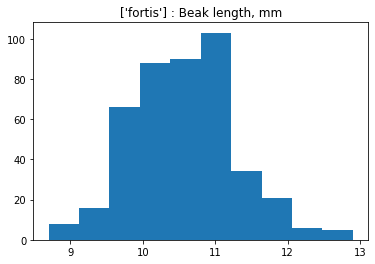

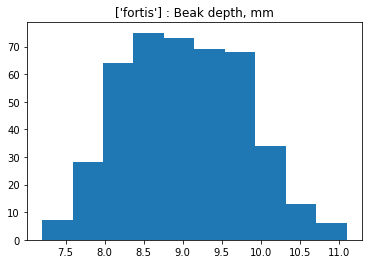

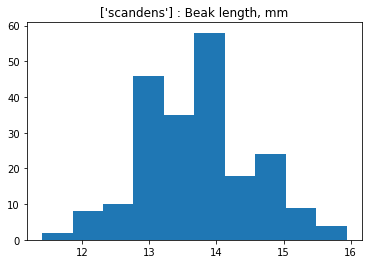

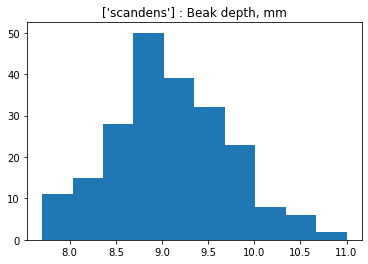

In [7]:
dataframes = [fortis, scandens]
columns = ['Beak length, mm', 'Beak depth, mm']


for df in dataframes:
    subset = df[columns]
    species = str(df['species'].unique())
    for col in subset.columns:
        plt.hist(subset[col])
        plt.title(species + ' : ' +col)
        plt.show()

<a id="EDA"></a>

# Exploratory Data Analysis of beak depths of Darwin's Finches


<a id="BD"></a>

### Investigation of G. scandens beak depth. The beak depth is defined as the distance, top to bottom, of a closed beak.


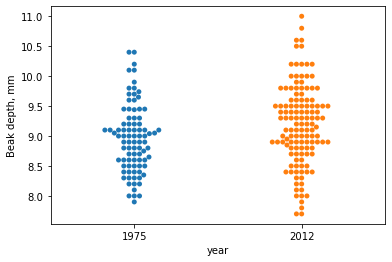

In [8]:
_ = sns.swarmplot(x= scandens['year'], y= scandens['Beak depth, mm'])

#### Empirical cumulative distribution function (ECDF) 

Creating a function that returns the coordenates to plot a ecdf from a give data. the x-values are the sorted data and the y-values go from 1/n to 1 in equally spaced increments.


In [9]:
def ecdf(data):
    '''Compute ECDF for a one-dimensional array of measurements'''
    #number of data points
    n = len(data)
    
    # x-data for the ecdf
    x = np.sort(data)
    
    # t-data for the ecdf
    y = np.arange(1, n+1)/n
    
    return x, y

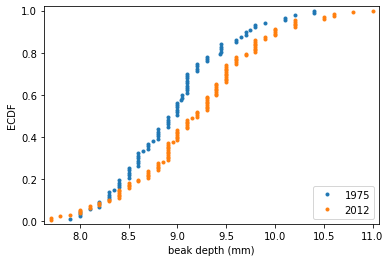

In [10]:
# Compute the ECDFs for the beak depth for both years, 1975 and 2021
x_75, y_75 = ecdf(scandens_75['Beak depth, mm'])
x_12, y_12 = ecdf(scandens_12['Beak depth, mm'])

# Plot the ECDFs
sns.set
_ = plt.plot(x_75, y_75, marker='.', linestyle='none')
_ = plt.plot(x_12, y_12, marker='.', linestyle='none')

# Set margins
plt.margins(0.02)

# Add axis labels and legend
_ = plt.xlabel('beak depth (mm)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('1975', '2012'), loc='lower right')

# Show the plot
plt.show()

From the EDCFs is much easier to see a clear difference in beak depths. The mean is larger in the 2012 data, and the variance does appear larger as well. 

#### Parameter Estimation of beak depths

The function *bootsrap_replicate_1d* takes a one-dimensional array, performs a resample with replacement and returns the value of the bootstrap replicate, there is, the summary statistics of a bootstrap sample (the summary statistics to be applied is defined by the user) 

The function *draw_bs_reps* generates many bootstrap replicates from a data set and stores them in an array. This function is useful to compute confidence intervals and uses the *boostrap_replicate_1d* function. 

In [11]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data. 
    
    Args:
        data (one-dimensional array) : data to be resampled
        func (str) : summary statistics to be applied
    Returns:
        array storing the boostrap replicates
    """
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)



def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates.
    Args:
        data (one-dimensional array): data to be resampled
        func (str): bootstrap replicate : summary statistics of a bootstrap sample
        size (int, optional) : number of bootstrap samples. 1 by default
    
    Returns:
        array storing the summary statistics (func) for each boostrap sample
    """
    
    # Initialize array of replicated
    bs_replicates = np.empty(size)
    
    
   # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data=data, func=func)

    return bs_replicates



#### Estimate the difference of the mean beak depth of the G.scandens 

In [12]:
# Difference of the sample means
mean_diff = np.mean(scandens_12['Beak depth, mm']) - np.mean(scandens_75['Beak depth, mm'])

# Getting bootstrap replicates of means 
bs_replicates_1975 = draw_bs_reps(scandens_75['Beak depth, mm'], np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(scandens_12['Beak depth, mm'], np.mean, 10000)

# Compute samples of difference of means 
bs_diff_replicates = bs_replicates_2012- bs_replicates_1975 

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates, [2.5, 97.5]) 

# Print the results
print('difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')


difference of means = 0.2262204724409429 mm
95% confidence interval = [0.06012105 0.39472516] mm


From the previous analysis, it seems pretty clear that the beaks of G.scandens on Daphne Major have gotten deeper. 

A natural question that rises from this is: Could it be that this effect is just due to random chance? In other words, what is the probability that we would get the observed difference in mean beak depth if the means were the same. 

The hypothesis is that the means are equal. To perform rhis hypothesis test, we need to shift the two data sets so that they have the same mean and then use bootstrap sampling to compute the difference of means. 

In [13]:
# Compute the mean of the combined data (1975 and 2012 - scandens dataframe)
combined_mean = np.mean(scandens['Beak depth, mm'])

# Shift the samples
bd_1975_shifted = scandens_75['Beak depth, mm'] - np.mean(scandens_75['Beak depth, mm']) + combined_mean
bd_2012_shifted = scandens_12['Beak depth, mm'] - np.mean(scandens_12['Beak depth, mm']) + combined_mean

# Get bootstrap replicates of shifted data sets
bs_replicates_1975 = draw_bs_reps(bd_1975_shifted, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(bd_2012_shifted, np.mean, 10000)

# Compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute the p-value
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)

# Print p-value
print('p =', p)


p = 0.0035


We get a p-value which suggests that there is a statistically significant difference between the means. A change of 0.2 mm in 37 years is substantial by evolutionary standards. 

<a id="shape"></a>

### Variation in beak shapes

Since the depth of the beak seems to have changed over time, it is only logical to ask if this is also the case for beak length. If the length and depth changed at the same rate, the beak has the same shape, it only got bigger. However, if the relationship between the beak length and beak depth change differently, the shape of the beak also changes.  

#### Exploratory data analysis of the beak length and depth 

Lets look at the relationship between beak length and beak depth over time for G. scandens. 


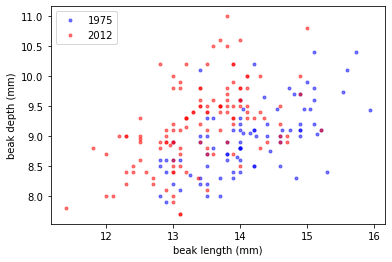

In [14]:
# scatter plot of 1975 data
_ = plt.plot(scandens_75['Beak length, mm'],  scandens_75['Beak depth, mm'], marker='.', linestyle='none', color='blue', alpha=0.5)

# scatter plot of 2012 data
_ = plt.plot(scandens_12['Beak length, mm'],  scandens_12['Beak depth, mm'], marker='.', linestyle='none', color='red', alpha=0.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Show the plot
plt.show()

By looking at the plot, it seems that the beaks got deeper (red points are higher in the y scale), but not really longer. If anything, they got a bit shorter, since the red points are to the left of the blue points. Overall, it looks like the beaks changed their shape - they became deeper and shorter. 

#### Linear Regressions

Perform a linear regression for both 1975 and 2012 data. Then, perform pairs bootstrap estimates for the regression parameters. Report a 95% confidence intervals on the slope and intercept of the regression line. 

The function *draw_bs_pairs_linreg* performs pairs bootstrap for linear regression. Resamples pairs of data and returns the slope and intercept of the line that best fits the data. the slope and intercept of each line (number of lines is determine by the number of pairs bootstraps defined by the size argument) are stored in *bs_slope_reps* and *bs_intercept_reps* respectively.  

In [15]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Performs pairs bootstrap for linear regression 
    pairs bootstraps involves resampling pairs of data. 
    Each collection of pairs fit with a line.
    
    Args:
    x (one-dimensional array)
    y (one-dimensional array)
    size (int, optional) : number of pairs bootstraps
    """
    # Array of indices to sample from
    inds = np.arange(len(x))
    
    # Initialize replicates
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)
    
    #Generate replicates
    for i in range(size):
        #creates a random sample of indices
        bs_inds = np.random.choice(inds, size=len(inds))
        #subsets each array according to the random indices
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        #computes a linear regression on said arrays
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)
    
    return bs_slope_reps, bs_intercept_reps

In [16]:
#Compute the linear regressions 
slope_75, intercept_75 = np.polyfit(scandens_75['Beak length, mm'], scandens_75['Beak depth, mm'], 1)
slope_12, intercept_12 = np.polyfit(scandens_12['Beak length, mm'], scandens_12['Beak depth, mm'], 1)

# Perform pairs bootstraps for the linear regressions
bl_75 = scandens_75['Beak length, mm'].to_numpy()
bd_75 = scandens_75['Beak depth, mm'].to_numpy()

bl_12 = scandens_12['Beak length, mm'].to_numpy()
bd_12 = scandens_12['Beak depth, mm'].to_numpy()

bs_slope_reps_75, bs_intercept_reps_75 = draw_bs_pairs_linreg(bl_75, bd_75, size=1000)
bs_slope_reps_12, bs_intercept_reps_12 = draw_bs_pairs_linreg(bl_12, bd_12, size=1000)

# Compute confidence intervals of slopes
slope_conf_int_75 = np.percentile(bs_slope_reps_75, [2.5, 97.5])
slope_conf_int_12 = np.percentile(bs_slope_reps_12, [2.5, 97.5])
intercept_conf_int_75 = np.percentile(bs_intercept_reps_75, [2.5, 97.5])
intercept_conf_int_12 = np.percentile(bs_intercept_reps_12, [2.5, 97.5])

# Print the results
print('1975: slope =', slope_75,
      'conf int =', slope_conf_int_75)
print('1975: intercept =', intercept_75,
      'conf int =', intercept_conf_int_75)
print('2012: slope =', slope_12,
      'conf int =', slope_conf_int_12)
print('2012: intercept =', intercept_12,
      'conf int =', intercept_conf_int_12)

1975: slope = 0.4652051691605937 conf int = [0.33184304 0.58758566]
1975: intercept = 2.3908752365842276 conf int = [0.69677231 4.22231999]
2012: slope = 0.462630358835313 conf int = [0.32804897 0.60391335]
2012: intercept = 2.977247498236019 conf int = [1.10326531 4.74818282]


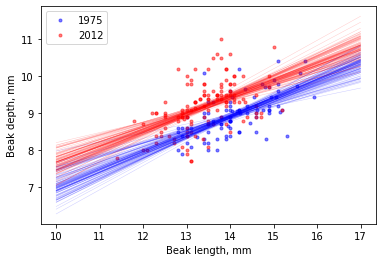

In [17]:
# Looking at the linear regressions
_ = plt.plot(bl_75, bd_75, marker='.', linestyle='none', color='blue', alpha=0.5)
_ = plt.plot(bl_12, bd_12, marker='.', linestyle='none', color='red', alpha=0.5)

_ = plt.xlabel('Beak length, mm')
_ = plt.ylabel('Beak depth, mm')
_ = plt.legend(('1975', '2012'), loc='upper left')

#Generate x-values for bootstrap lines
x = np.array([10,17])

#plot bootstrap lines
for i in range(100):
    plt.plot(x, (bs_slope_reps_75[i] * x + bs_intercept_reps_75[i]), linewidth= 0.5, alpha=0.2, color='blue')
    plt.plot(x, (bs_slope_reps_12[i] * x + bs_intercept_reps_12[i]), linewidth=0.5, alpha=0.2, color='red')

# Draw the plot again
plt.show()

The linear regression showed interesting information about the beak geometry. The slope was the same in 1975 and 2012, suggesting that for every millimeter gained in beak length, the birds gained about half millimeter in depth in both years. However, if we are interested in the shape of the beak, we want to compare the ratio of beak length to beak depth.

#### Beak length to depth ratio

The ratio is calculated as : Beak length/Beak depth

In [43]:
# Compute length-to-depth ratios
ratio_75 = bl_75/bd_75
ratio_12 = bl_12/bd_12 

# Compute means
mean_ratio_75 = np.mean(ratio_75)
mean_ratio_12 = np.mean(ratio_12)

# Generate bootstrap replicates of the means
bs_replicates_75 = draw_bs_reps(ratio_75, np.mean, 10000)
bs_replicates_12 = draw_bs_reps(ratio_12, np.mean, 10000)

# Compute the 99% confidence intervals
conf_int_75 = np.percentile(bs_replicates_75, [0.5, 99.5])
conf_int_12 = np.percentile(bs_replicates_12, [0.5, 99.5])

# Print the results
print('1975: mean ratio =', mean_ratio_75,
      'conf int =', conf_int_75)
print('2012: mean ratio =', mean_ratio_12,
      'conf int =', conf_int_12)



1975: mean ratio = 1.5788823771858533 conf int = [1.55677918 1.60130615]
2012: mean ratio = 1.4658342276847767 conf int = [1.4448598  1.48770511]


,ratio,year,percentile_05,percentile_995
0,1.578882,1975,1.556779,1.601306
1,1.465834,2012,1.444860,1.487705


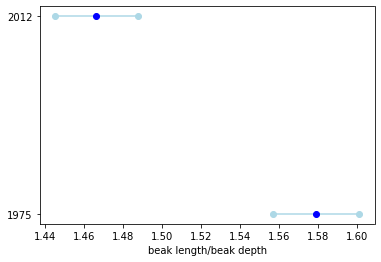

In [79]:
p75_05 = np.percentile(bs_replicates_75, 0.5)
p75_995 = np.percentile(bs_replicates_75, 99.5)
p12_05 = np.percentile(bs_replicates_12, 0.5)
p12_995 = np.percentile(bs_replicates_12, 99.5)

r_all = pd.DataFrame({'ratio':[mean_ratio_75, mean_ratio_12], 
                      'year': [1975, 2012],
                      'percentile_05': [p75_05, p12_05],
                      'percentile_995' : [p75_995, p12_995]}) 


display(r_all)


for lower,upper,y,m in zip(r_all['percentile_05'],r_all['percentile_995'],range(len(r_all)),r_all['ratio']):
    plt.plot((lower,upper),(y,y),'ro-',color= 'lightblue')
    plt.plot(m, y, linestyle='none', marker='o', color='blue')
    plt.yticks(range(len(r_all)),list(r_all['year']))
    plt.xlabel('beak length/beak depth')


The mean beak length-to-depth ratio decreased by about 0.1, from 1975 to 2012. The 99% confidence intervals are not even close to overlapping, so this is a real change. The beak shape changed. 